# DSDBAL ASSIGNMENT NO. 2 

## 1. Importing all the required Python Libraries.

In [1269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Dataset into pandas’ data frame.

In [1270]:
df=pd.read_csv('StudentsPerformance.csv')

In [1271]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2.1 Dimesnions of Dataset

In [1272]:
df.shape

(1000, 8)

Thus , the StudentsPerformance dataset contains total of **1000** records and 8 attributes 

### 2.2 Variable Description and their type

In [1273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [1274]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Findings :

1. Mean for all scores is quite close

2. minimum marks scored in Maths is 0 ,while it is 17 and 10 in reading and writing repsectively

3. 25 % of students scored below 57 in math, 59 in reading, and 57.75 in writing.

4. 75% of students scored below 77 in math, 79 in reading, and 79 in writing

5. max: highest possible score in all three subjects (math, reading, writing) is 100.


In [1275]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


Findings :

1. In this dataset ,there are two genders male and female thus unique=2 and females occur 518 times

2. There are 5 different race/ethnicity from Group A to E ,out of which Group C occurs the most(319 times)

3. parental level of education denotes that most student's parents completed education in some college 

4. about 642 students have no test preparation course


## 3.Data Preprocessing

### 3.1. Scanning all variables for missing values and inconsistencies.

In [1276]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### No Null value exists in StudentsPerformance dataset 

#### 3.2 Thus, Introducing Null Values in columns to Handle Missing values 

In [1277]:
def introduce_null_values(df,maxnull=1):  #by default1 incase not passed 
    for col in df.columns:
        null_count=np.random.randint(1,maxnull+1) #
        
        #randomly choosing the indices on which the null values are to be set 
        indices=np.random.choice(df.index,replace=False,size=null_count)
        df.loc[indices,col]=np.nan

    return df
df=introduce_null_values(df,12)

In [1278]:
df.isnull().sum()

gender                          7
race/ethnicity                  1
parental level of education     1
lunch                           4
test preparation course        11
math score                      2
reading score                   9
writing score                  11
dtype: int64

### 3.3 Handling Missing Values (Numerical)

#### 1. backward fill : bfill()

In [1279]:
df['math score']=df['math score'].bfill()

In [1280]:
df.isnull().sum()

gender                          7
race/ethnicity                  1
parental level of education     1
lunch                           4
test preparation course        11
math score                      0
reading score                   9
writing score                  11
dtype: int64

#### 2. forward fill : ffill()

In [1281]:
df['writing score']=df['writing score'].ffill().bfill()

In [1282]:
df.isnull().sum()

gender                          7
race/ethnicity                  1
parental level of education     1
lunch                           4
test preparation course        11
math score                      0
reading score                   9
writing score                   0
dtype: int64

#### 3.Imputing with Median

In [1283]:
df['reading score']=df['reading score'].fillna(df['reading score'].median())

In [1284]:
df.isnull().sum()

gender                          7
race/ethnicity                  1
parental level of education     1
lunch                           4
test preparation course        11
math score                      0
reading score                   0
writing score                   0
dtype: int64

### 3.3 Handling Missing Values (Categorical)

In [1285]:

for col in df.columns:
    if df[col].dtype=='object':
        df[col]=df[col].fillna(df[col].mode()[0])
            

In [1286]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [1287]:
# for col in df.columns:
#     if df[col].dtype=='object':
#         df[col]=df[col].astype('string')
# df.dtypes

## 4.Label Encoding

### Before Lable Encoding

In [1288]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [1289]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

### After Lable Encoding

In [1290]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72.0,72.0,74.0
1,0,2,4,1,0,69.0,90.0,88.0
2,0,1,3,1,1,90.0,95.0,93.0
3,1,0,0,0,1,47.0,57.0,44.0
4,1,2,4,1,1,76.0,78.0,75.0


## 5. Identifying Outliers 

### 5.1 BOXPLOT

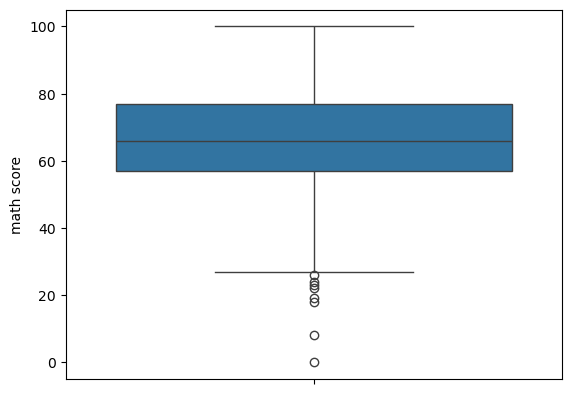

In [1291]:
sns.boxplot(data=df['math score'])
plt.show()

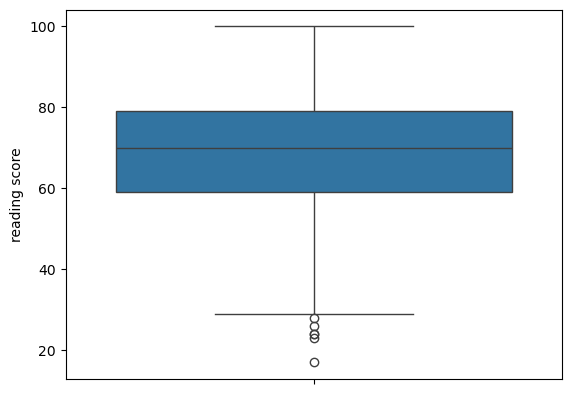

In [1292]:
sns.boxplot(data=df['reading score'])
plt.show()

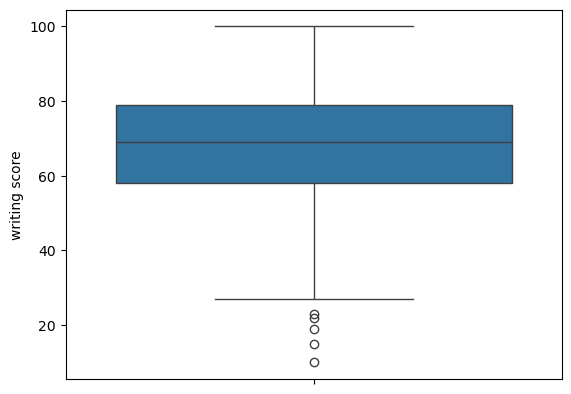

In [1293]:
sns.boxplot(data=df['writing score'])
plt.show()

## 6. Removing Outliers 

### 6.1 Inter Quartile Range Method

In [1294]:
Q1=df['math score'].quantile(0.25)
Q3=df['math score'].quantile(0.75)
IQR=Q3-Q1
print(IQR,Q1,Q3)

20.0 57.0 77.0


In [1295]:
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR

In [1296]:
print(LB,UB)

27.0 107.0


In [1297]:
outliers=df[(df['math score']<LB)|(df['math score']>UB)]
outliers.count()

gender                         8
race/ethnicity                 8
parental level of education    8
lunch                          8
test preparation course        8
math score                     8
reading score                  8
writing score                  8
dtype: int64

In [1298]:
outliers.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,0,1,5,0,1,18.0,32.0,28.0
59,0,2,5,0,1,0.0,17.0,10.0
145,0,2,4,0,1,22.0,39.0,33.0
338,0,1,5,0,1,24.0,38.0,27.0
466,0,3,0,0,1,26.0,31.0,38.0
787,0,1,4,1,1,19.0,38.0,32.0
842,0,1,2,0,0,23.0,44.0,36.0
980,0,1,2,0,1,8.0,24.0,23.0


#### Filter the data to remove outliers

In [1299]:
df_no_outliers = df[(df['math score'] >= LB) & (df['math score'] <= UB)]

In [1300]:
df_no_outliers.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,0.482863,2.179435,2.477823,0.651210,0.642137,66.506048,69.443548,68.406250
std,0.499958,1.158508,1.827449,0.476828,0.479613,14.564515,14.240221,14.841758
min,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,23.000000,15.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.000000,60.000000,58.000000
50%,0.000000,2.000000,2.000000,1.000000,1.000000,66.000000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.000000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.000000,100.000000,100.000000


### Now the min for math score is not 0  (an outlier) , as it was before 

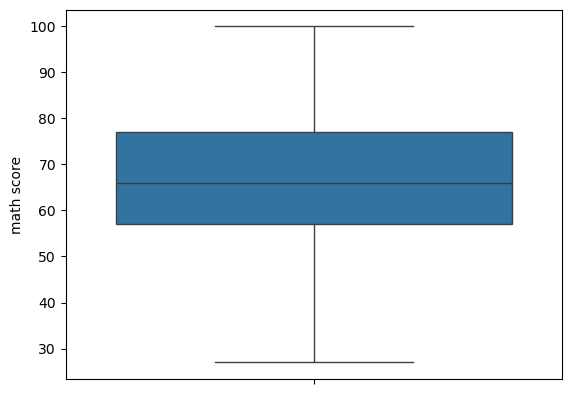

In [1301]:
sns.boxplot(data=df_no_outliers['math score'])
plt.show()

### 6.2 Z-SCORE

In [1302]:
threshold = 3
z_scores_writing = (df['writing score'] - df['writing score'].mean()) / df['writing score'].std()
df_cleaned = df[(np.abs(z_scores_writing) <= threshold)]


In [1303]:
df.describe()  #before

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.479000,2.174000,2.48500,0.647000,0.644000,66.114000,69.151000,68.086000
std,0.499809,1.157179,1.82842,0.478142,0.479055,15.168028,14.571634,15.224927
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,17.000000,10.000000
25%,0.000000,1.000000,1.00000,0.000000,0.000000,57.000000,59.000000,58.000000
50%,0.000000,2.000000,2.00000,1.000000,1.000000,66.000000,70.000000,69.000000
75%,1.000000,3.000000,4.00000,1.000000,1.000000,77.000000,79.000000,79.000000
max,1.000000,4.000000,5.00000,1.000000,1.000000,100.000000,100.000000,100.000000


In [1304]:
df_cleaned.describe() #after

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,0.477912,2.175703,2.478916,0.648594,0.642570,66.291165,69.338353,68.293173
std,0.499763,1.155390,1.827912,0.477649,0.479484,14.916032,14.295340,14.896575
min,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,24.000000,23.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.000000,59.000000,58.000000
50%,0.000000,2.000000,2.000000,1.000000,1.000000,66.000000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.000000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.000000,100.000000,100.000000


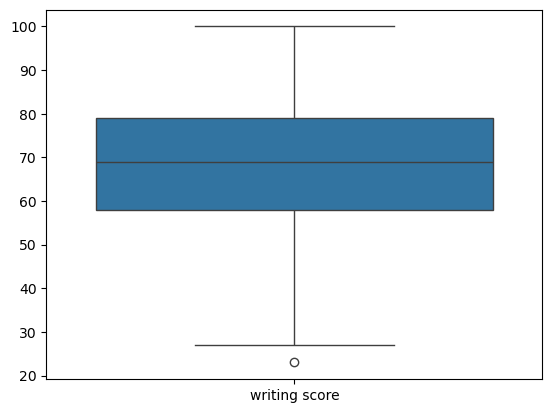

In [1305]:
sns.boxplot(data=df_cleaned[[ 'writing score']])
plt.show()

In [1306]:
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['reading score'] >= lower_bound) & (df['reading score'] <= upper_bound)]



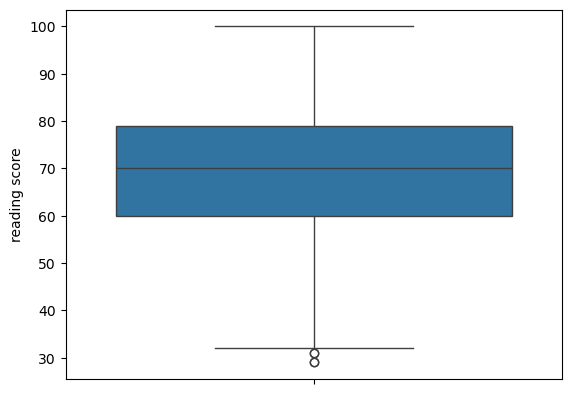

In [1307]:
sns.boxplot(data=df_cleaned[ 'reading score'])
plt.show()

In [1308]:
df_cleaned.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.477867,2.177062,2.477867,0.649899,0.641851,66.381288,69.425553,68.380282
std,0.499761,1.155937,1.829052,0.477241,0.479698,14.782426,14.176381,14.783917
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,29.000000,27.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.000000,60.000000,58.000000
50%,0.000000,2.000000,2.000000,1.000000,1.000000,66.000000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.000000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.000000,100.000000,100.000000


## 7. Scaling

### 7.1 MinMaxScaler

In [1309]:
from scipy.stats import zscore
df['z_score'] = zscore(df['reading score'])
threshold = 3
df_cleaned = df[np.abs(df['z_score']) <= threshold]

In [1310]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
mscaler=MinMaxScaler()

df['zscore_minmax']=mscaler.fit_transform(df[['z_score']])
print(df[['z_score', 'zscore_minmax']].head())

    z_score  zscore_minmax
0  0.195615       0.662651
1  1.431509       0.879518
2  1.774814       0.939759
3 -0.834298       0.481928
4  0.607580       0.734940


### 7.2 StandardScaler

In [1311]:
sscaler=StandardScaler()

df['zscore_std']=sscaler.fit_transform(df[['z_score']])
print(df[['z_score','zscore_std']].head())

    z_score  zscore_std
0  0.195615    0.195615
1  1.431509    1.431509
2  1.774814    1.774814
3 -0.834298   -0.834298
4  0.607580    0.607580


### 7.3 RobustScaler

In [1312]:
scaler = RobustScaler()

df['zscore_robust'] = scaler.fit_transform(df[['z_score']])
print(df[['z_score', 'zscore_robust']].head())


    z_score  zscore_robust
0  0.195615           0.10
1  1.431509           1.00
2  1.774814           1.25
3 -0.834298          -0.65
4  0.607580           0.40


In [1313]:
s1=df['zscore_minmax'].skew()
s2=df['zscore_minmax'].skew()
s3=df['zscore_robust'].skew()

In [1314]:
print(s1)
print(s2)
print(s3)

-0.26071328140218775
-0.26071328140218775
-0.26071328140218863
